In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def timer(func, *args):
    t1 = time.time()
    func(*args)
    return time.time() - t1

def mean(n):
    return np.sum(n) / n.shape[0]
def std(n, ddof=0):
    return np.sqrt((1/(n.shape[0]-ddof) * np.sum((n-mean(n))**2)))
def norm(n):
    return (n - mean(n)) / std(n)
def corr(x, y):
    return np.sum(norm(x)*norm(y))/x.shape[0]

In [3]:
class OLS:
    """
        Ordinary least squares Linear Regression using statistics.
    """
    def fit(self, x, y):
        "Fit linear model."
        self.x_mean = np.mean(x)
        self.y_mean = np.mean(y)
        
        self.x_std = np.std(x)
        self.y_std = np.std(y)
        
        self.r = np.corrcoef(x, y)[0,1]
        
    def predict(self, x):
        "Predict using the linear model."
        if not isinstance(x, np.ndarray):
            x = np.array(x)
        temp = self.r * self.y_std / self.x_std
        return temp * (x - self.x_mean) + self.y_mean

In [4]:
a = OLS()
a.fit(x, y)
a.predict(x_test)

NameError: name 'x' is not defined

In [5]:
class LinearRegression:
    def __init__(self, n_iterations=1000, learning_rate=0.001, gradient=True):
        self.n_iterations = n_iterations
        self.lr = learning_rate
        self.gradient = gradient
        
    def fit(self, x, y):
        x = np.insert(x, 1, 1, axis=1)
        self.w = np.linalg.solve(np.matmul(x.T, x), np.matmul(x.T, y))
        
    def predict(self, x):
        x = np.insert(x, 1, 1, axis=1)
        return x.dot(self.w)

In [46]:
x = np.random.rand(20, 1)
y = (3 * x + 1.5).reshape(-1)

In [23]:
l = LinearRegression()
l.fit(x, y)
pred = l.predict(np.array(x_test).reshape(-1, 1))

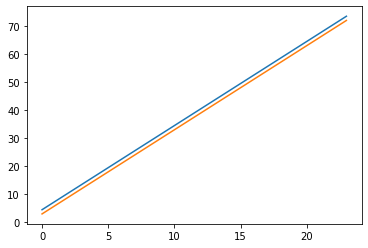

In [27]:
plt.plot(pred)
plt.plot(y_test)

In [74]:
sum([timer(mean, x) for _ in range(100000)])

0.5986757278442383

In [75]:
sum([timer(npmean, x) for _ in range(100000)])

0.8120241165161133

In [28]:
x_test = np.array(list(range(1, 25))).reshape(-1, 1)
y_test = [3*i for i in x_test]

In [160]:
asd = np.insert(x, 1, 1, axis=1)

In [167]:
w = np.linalg.solve(asd.T.dot(asd), asd.T.dot(y))

In [177]:
np.insert(np.array([[1]]), 1, 1, axis=1).dot(w)

array([[3.5]])

In [59]:
_2 = np.matmul(a.T, b)

In [60]:
_1 = np.matmul(a.T, a)

In [62]:
np.linalg.solve(_1, _2)

array([3., 3.])

In [91]:
A = np.array([[5,3,1.], [3,9,4], [3,3,3]])
b = np.array([9, 16., 9])

In [112]:
sum([timer(solver, A, b) for _ in range(100)])

0.013780832290649414

In [113]:
sum([timer(np.linalg.solve, A, b) for _ in range(100)])

0.0064656734466552734

In [ ]:
timer(solver, A, b)

In [84]:
def solver(A, b):
    assert A.shape[0] == b.shape[0], f"Shapes do not match with {A.shape[0], b.shape[0]}"
    A = A.copy()
    b = b.copy()
    for i in range(A.shape[0]):
        val = 1/A[i,i]
        A[i] = A[i] * val
        b[i] = b[i] * val
        for j in range(A.shape[0]):
            if i == j:
                continue
            b[j] = b[j] - (b[i] * A[j,i])
            A[j] = A[j] - (A[i] * A[j,i])
    return b

In [ ]:
self.w = 

In [50]:
a = np.insert(x, 1, 1, axis=1).dot(np.random.uniform(-1, 1, (2, )))

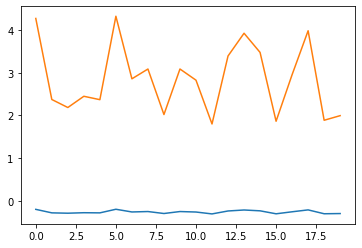

In [51]:
plt.plot(a)
plt.plot(y)

$$
    \hat y = mx + b
$$

In [ ]:
def grad()